# Gradient Descent for binary classification 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [2]:
def getRandomSamples(mu, sigma, numPoints):
    """Returns a numpy array of random points in the form [[x0,y0], [x1,y1], ...]"""
    xRV = np.random.normal(mu, sigma, numPoints) #mu, sigma
    yRV = np.random.normal(mu, sigma, numPoints) #mu, sigma
    samples = np.array([xRV, yRV]).T
    return samples
    
def sigmoid(x):
    """Returns the sigmoid of a x in the same shape of x (scalar, vector, matrix, etc...)"""
    return 1/(1+np.exp(-x))

def crossEntropy(points, params, y):
    """
    Returns the cross entropy i.e. a measure of model performance
    https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8
    """
    n = points.shape[0] #number of points
    p = sigmoid(points*params)
    ce = -(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
    return ce

def gradient_descent(points, params, y , alpha, epochs):
    """finds the line of best fit by gradient desecent"""
    n=points.shape[0]
    for i in range(epochs):
        p=sigmoid(points*params)
        gradient= points.T*(p-y)*(alpha/n)
        params = params - gradient
        w1,w2,b = np.asarray(params)[:,0]
        x1=np.array([points[:,0].min(), points[:,0].max()])
        x2= -b/w2 + (x1*(-w1/w2))
        #updatePlot(x1,x2) # <================= comment this out if running in in jupyter notebook
        ce = crossEntropy(points,params, y)
        #print(ce)
    return x1, x2, ce
        
def updatePlot(x1,x2):
    """updates the plot for animation"""
    line = plt.plot(x1,x2)
    plt.pause(0.0001)
    line[0].remove()

### Generate two random classes

In [3]:
#use random seed to reproduce the same samples
#np.random.seed(31)
numPoints=100 #points per class
mu1 = 10.1
sigma1 = 1.7
mu2 = 5.2
sigma2 = 1.6
class1 = getRandomSamples(mu1, sigma1, numPoints)
class2 = getRandomSamples(mu2, sigma2, numPoints)
points = np.vstack((class1, class2))

### Show the samples

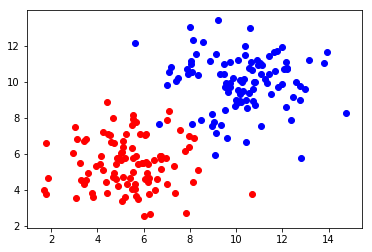

In [4]:
plt.scatter(class1[:,0], class1[:,1], color='b')
plt.scatter(class2[:,0], class2[:,1], color='r')
plt.show()

### estimate the initial line of separation (model)
- can use all zeros, play with the values
- w1x1 + w2x2 + b = 0 (i.e. y=mx+b)

In [5]:
w1 = np.random.normal(0, .1, 1)[0]
w2 = np.random.normal(0, .1, 1)[0]
b = np.random.normal(0, .1, 1)[0]
params = np.matrix([w1, w2, b]).T
x1 = np.array([points[:,0].min(), points[:,0].max()]) 
x2 = -b/w2 + x1*(-w1/w2) #again, y=mx+b 

### Show the initial estimated line
- depending on the values, it might not show if set_ylim is active

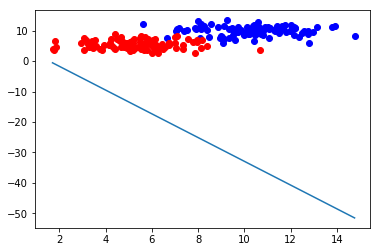

In [6]:
plt.scatter(class1[:,0], class1[:,1], color='b')
plt.scatter(class2[:,0], class2[:,1], color='r')
plt.plot(x1,x2)
axes = plt.gca()
#comment this line out if needed
#axes.set_ylim([0,points[:,1].max()+2]) #set the y axis range, looks better like this
plt.show()

### Generate the bias
- set to 1, used for convention, not necessary for this example

In [7]:
bias = np.ones((numPoints*2,1))
points = np.hstack((points, bias))

### Generate the labels

In [8]:
y = np.array([np.zeros(numPoints), np.ones(numPoints)]).flatten().reshape(numPoints*2,1) 

### Use cross entropy to evaluate our model 
- our model is the line w1x1 + w2x2 +b = 0
- cross entropy -(ln(P(classA)) + ln(P(classB)) ...)
- https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
- lower entropy = better model
- then gradient decent is used to continue to minimize the error calculated by cross entropy

In [9]:
ce = crossEntropy(points, params, y)

### If NOT running in jupyter notebook, uncomment these to initialize the plot for visualization

In [10]:
# plt.scatter(class1[:,0], class1[:,1], color='b')
# plt.scatter(class2[:,0], class2[:,1], color='g')
# axes = plt.gca()
# axes.set_ylim([0,points[:,1].max()+2]) 

### Perform gradient descent and visualize the progress in real time if not running on jupyter
- TODO add animation to jupyter for this, there are a couple of ways to do it

In [11]:
x1, x2, ce = gradient_descent(points, params, y , 0.06, 1500)

### if NOT running in jupyter notebook, comment these lines out as the graph is already visualized
- here we plot the final line found by gradient descent

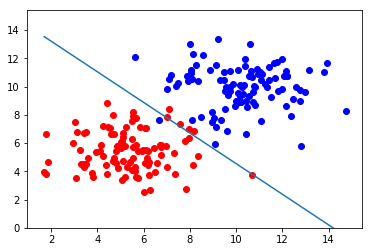

In [12]:
plt.scatter(class1[:,0], class1[:,1], color='b')
plt.scatter(class2[:,0], class2[:,1], color='r')
axes = plt.gca()
axes.set_ylim([0,points[:,1].max()+2]) 
plt.plot(x1,x2)

In [13]:
plt.show()

### Finally, what is the cross entropy of our model (measure of performance)

In [14]:
print(ce)

[[0.19168998]]
